In [2]:
import pandas as pd

In [10]:
ratings_df =pd.read_csv('data/BX-Book-Ratings.csv', sep=';', encoding = 'unicode_escape')
books_df= pd.read_csv('data/BX-Books.csv', sep=';' , error_bad_lines=False, encoding = "ISO-8859-1")
books_df = books_df[['ISBN', 'Book-Title', 'Year-Of-Publication', 'Publisher','Book-Author']]
users_df= pd.read_csv('data/BX-Users.csv', sep=';' , error_bad_lines=False, encoding = "ISO-8859-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [4]:
merged_df =books_df.merge(ratings_df).merge(users_df)

In [6]:
merged_df=merged_df.rename({'Book-Title':'Title', 'Year-Of-Publication':'Year', 'Book-Author':'Author',
       'User-ID':'UserId', 'Book-Rating':'Rating'}, axis = 1)
df = merged_df.groupby(['Title'])[['Age']]

In [7]:
df.count().sort_values('Age', ascending = False).head(10)

,Age
Title,
Wild Animus,2141
The Lovely Bones: A Novel,920
The Da Vinci Code,708
Bridget Jones's Diary,599
The Nanny Diaries: A Novel,573
Angels &amp; Demons,552
The Secret Life of Bees,547
A Painted House,517
Life of Pi,516


In [12]:
import matplotlib.pyplot as plt

In [13]:
merged_df.columns

Index(['ISBN', 'Title', 'Year', 'Publisher', 'Author', 'UserId', 'Rating',
       'Location', 'Age'],
      dtype='object')

In [14]:
df = merged_df.groupby(['Title'])[['Age']]

[Text(0, 0, 'Wild Animus'),
 Text(0, 0, 'The Lovely Bones: A Novel'),
 Text(0, 0, 'The Da Vinci Code'),
 Text(0, 0, "Bridget Jones's Diary"),
 Text(0, 0, 'The Nanny Diaries: A Novel'),
 Text(0, 0, 'Angels &amp; Demons'),
 Text(0, 0, 'The Secret Life of Bees'),
 Text(0, 0, 'A Painted House'),
 Text(0, 0, 'Life of Pi'),
 Text(0, 0, 'Divine Secrets of the Ya-Ya Sisterhood: A Novel')]

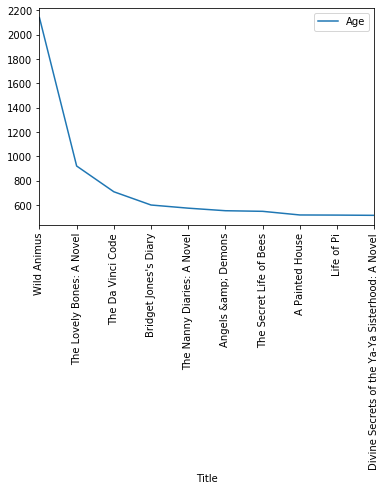

In [15]:
ax= df.count().sort_values('Age', ascending = False).head(10).plot()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [16]:
rt_count_df = df.count().sort_values('Age', ascending = False)

In [17]:
rt_count_df.head()

,Age
Title,
Wild Animus,2141
The Lovely Bones: A Novel,920
The Da Vinci Code,708
Bridget Jones's Diary,599
The Nanny Diaries: A Novel,573


In [18]:
rt_sum_df = df.sum().sort_values('Age', ascending = False)

In [19]:
rt_sum_df.head()

,Age
Title,
Wild Animus,73354.0
The Lovely Bones: A Novel,33326.0
The Da Vinci Code,27171.0
Angels &amp; Demons,21227.0
The Secret Life of Bees,21041.0


In [35]:
title_rating_count = pd.crosstab(merged_df.Title, merged_df.Rating)

In [34]:
pd.crosstab(merged_df.Title, merged_df.Rating).sort_values(10, ascending = False).head()

Rating,0,1,2,3,4,5,6,7,8,9,10
Title,,,,,,,,,,,
The Da Vinci Code,404,2,1,6,3,23,23,56,90,130,160
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),260,2,1,0,0,7,7,20,60,66,152
Harry Potter and the Prisoner of Azkaban (Book 3),151,0,0,0,0,11,7,22,29,58,150
The Lovely Bones: A Novel,588,1,3,7,4,29,33,115,188,179,148
Harry Potter and the Chamber of Secrets (Book 2),230,0,0,0,1,9,7,31,67,72,139


In [32]:
pd.crosstab(merged_df.ISBN, merged_df.Rating).columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='Rating')

In [51]:
title_rating_count.sort_values(1, ascending = False).head()

Rating,0,1,2,3,4,5,6,7,8,9,10
Title,,,,,,,,,,,
Wild Animus,1921,74,82,87,58,88,66,60,40,16,10
The Bridges of Madison County,261,5,2,4,5,17,12,27,45,29,36
Isle of Dogs,182,5,8,9,10,23,19,11,12,4,5
Bridget Jones's Diary,438,5,3,3,9,30,39,67,92,60,69
Bleachers,93,4,2,4,4,18,9,14,23,10,8


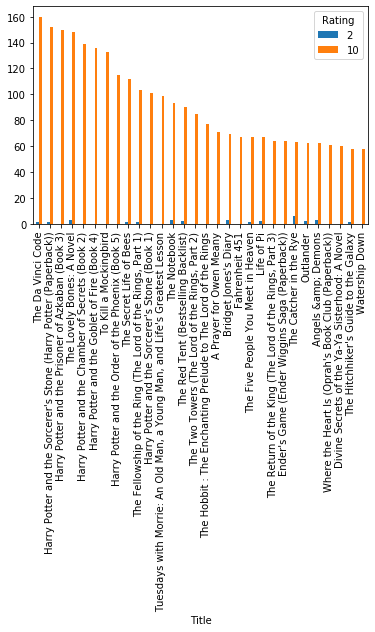

In [60]:
title_rating_count.sort_values(10, ascending = False)[[2, 10]].head(30).plot(kind = 'bar')


In [65]:
books_df= pd.read_csv('data/BX-Books.csv', sep=';' , error_bad_lines=False, encoding = "ISO-8859-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/Users/pankaj/anaconda/envs/ML7331/lib/python3.7/site-packages/IPython/cor

In [66]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [69]:
books_df['Image-URL-L']

0         http://images.amazon.com/images/P/0195153448.0...
1         http://images.amazon.com/images/P/0002005018.0...
2         http://images.amazon.com/images/P/0060973129.0...
3         http://images.amazon.com/images/P/0374157065.0...
4         http://images.amazon.com/images/P/0393045218.0...
                                ...                        
271355    http://images.amazon.com/images/P/0440400988.0...
271356    http://images.amazon.com/images/P/0525447644.0...
271357    http://images.amazon.com/images/P/006008667X.0...
271358    http://images.amazon.com/images/P/0192126040.0...
271359    http://images.amazon.com/images/P/0767409752.0...
Name: Image-URL-L, Length: 271360, dtype: object